<a href="https://colab.research.google.com/github/AldrinJoshua/GDP-PredictorModels/blob/lstm/LSTM_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Open dataset
from google.colab import files
#uploaded = files.upload()
data = pd.read_csv('car_gdp.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Years              420 non-null    object 
 1   Sectors            420 non-null    object 
 2   Province           420 non-null    object 
 3   GDP Growth Sector  420 non-null    float64
 4   GDP Growth Rate    420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [ ]:
# Data Splitting
reversed_data = data.iloc[::-1]

train_data = pd.DataFrame()
test_data = pd.DataFrame()

current_year = None
current_rows = []
separated_dfs = []

for _, row in reversed_data.iterrows():
    year = row['Years']

    if current_year is not None and year != current_year:
        separated_dfs.append(pd.DataFrame(current_rows))
        current_rows = []

    current_rows.append(row)
    current_year = year

if current_year is not None:
    separated_dfs.append(pd.DataFrame(current_rows))

for i, year in enumerate(separated_dfs):
  if i == 0:
    test_data = year['GDP Growth Rate']
  else:
    if train_data.empty:
      train_data = year['GDP Growth Rate']
    else:
      train_data = pd.concat([train_data, year['GDP Growth Rate']])

# Revert back to original order
train_data = train_data.iloc[::-1]
test_data = test_data.iloc[::-1]

train_len = len(train_data)
test_len = len(test_data)

print("Train data: ", train_data, "Length: ", train_len)
print("Test data: ", test_data, "Length: ", test_len)

Train data:  0      4.3
1      4.3
2      4.3
3      4.3
4      4.3
      ... 
310    9.6
311    9.6
312    9.6
313    9.6
314    9.6
Name: GDP Growth Rate, Length: 315, dtype: float64 Length:  315
Test data:  315    14.6
316    14.6
317    14.6
318    14.6
319    14.6
       ... 
415    13.3
416    13.3
417    13.3
418    13.3
419    13.3
Name: GDP Growth Rate, Length: 105, dtype: float64 Length:  105


In [ ]:
# Reshape dataset into 1 column
train=train_data.values.reshape(-1,1)
train

array([[  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  4.3],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  3. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  4. ],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  5.3],
       [  3. ],
       [  3. ],
       [

In [ ]:
# Normalization of data using MinMaxScaler (scales the data between the range [0,1])
scaler = MinMaxScaler()
scaled_trainset = scaler.fit_transform(train)
scaled_trainset

array([[0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.75      ],
       [0.75      ],
       [0.75 

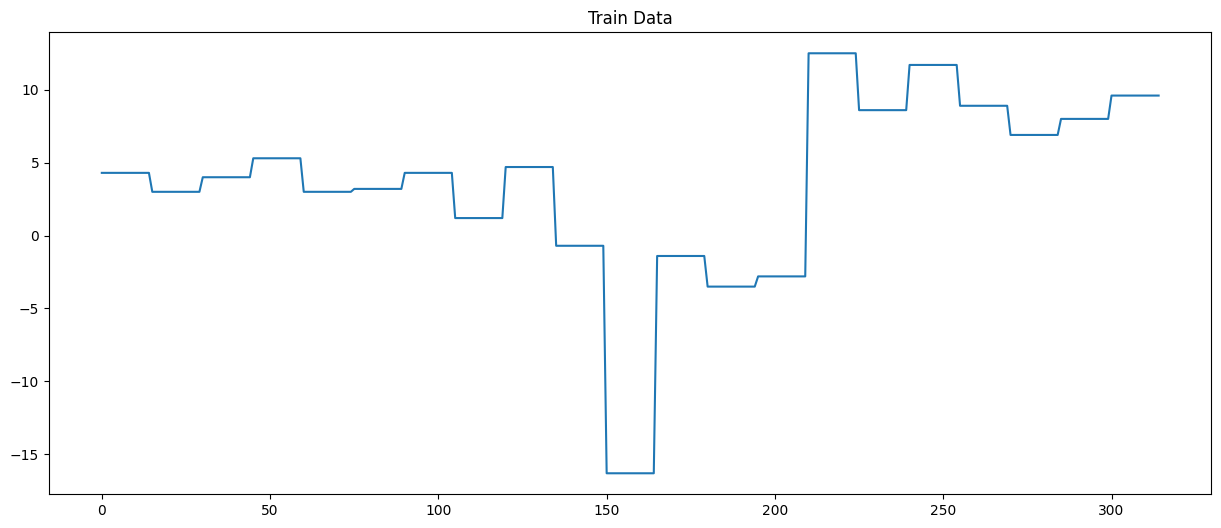

In [ ]:
# Train dataset
plt.subplots(figsize = (15,6))
plt.plot(train)
plt.title("Train Data")
plt.show()

In [ ]:
# Split training into feature and label.

x_train = []
y_train = []
step = 2

for i in range(step, train_len):
    x_train.append(scaled_trainset[i-step:i,0])
    y_train.append(scaled_trainset[i,0])

In [ ]:
# Store into arrays X_train and y_train
X_train, y_train = np.array(x_train), np.array(y_train)

# Reshape X_train into 3D
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
y_train.reshape(y_train.shape[0],1)

array([[0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.71527778],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.67013889],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.70486111],
       [0.75      ],
       [0.75      ],
       [0.75      ],
       [0.75      ],
       [0.75 

In [ ]:
# LSTM model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Create Model
model = Sequential()

model.add(
    LSTM(units = 512, return_sequences= True, input_shape = (X_train.shape[1],1), activation='relu'))

model.add(
    Dropout(0.2))

model.add(
    LSTM(units = 64, activation='relu'))

model.add(
    Dropout(0.2)
             )
model.add(
    Dense(units = 1, activation='relu'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2, 512)            263168    
                                                                 
 dropout (Dropout)           (None, 2, 512)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                36928     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 300161 (1.15 MB)
Trainable params: 300161 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 3s 9ms/step - loss: 0.0809 - accuracy: 0.0799
Epoch 2/50
40/40 [==============================] - 0s 11ms/step - loss: 0.0186 - accuracy: 0.0895
Epoch 3/50
40/40 [==============================] - 1s 14ms/step - loss: 0.0167 - accuracy: 0.0927
Epoch 4/50
40/40 [==============================] - 1s 17ms/step - loss: 0.0167 - accuracy: 0.0895
Epoch 5/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0168 - accuracy: 0.0927
Epoch 6/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0138 - accuracy: 0.0927
Epoch 7/50
40/40 [==============================] - 0s 11ms/step - loss: 0.0158 - accuracy: 0.0895
Epoch 8/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0154 - accuracy: 0.0927
Epoch 9/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.0895
Epoch 10/50
40/40 [==============================] - 0s 11ms/step - loss: 0.0122 - accuracy: 0.0927
Epoch 11/50


Text(0.5, 1.0, 'Train Loss')

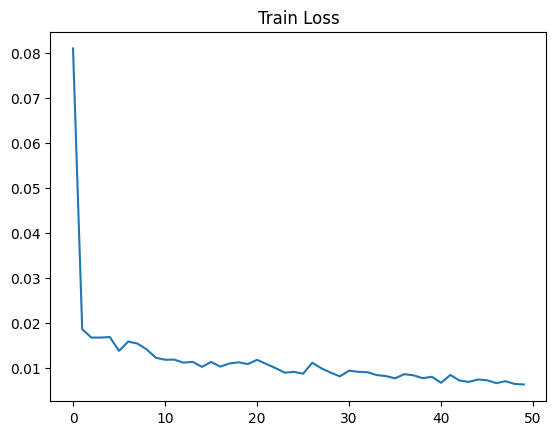

In [ ]:
plt.plot(history.history['loss'])
plt.title("Train Loss")

Text(0.5, 1.0, 'Train Accuracy')

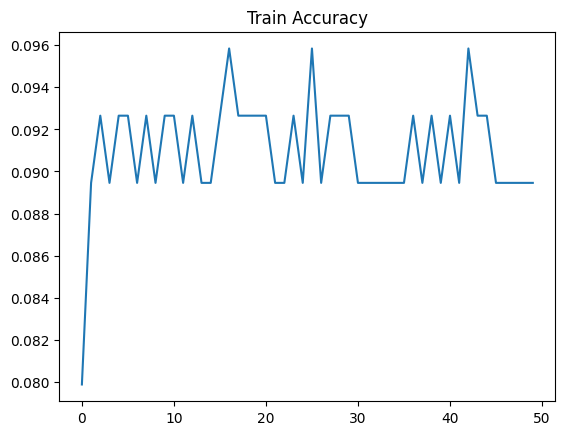

In [ ]:
plt.plot(history.history['accuracy'])
plt.title("Train Accuracy")

In [ ]:
y_pred = model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred.reshape(1,-1))

10/10 [==============================] - 0s 8ms/step


In [ ]:
y_train = scaler.inverse_transform(y_train.reshape(1,-1))

array([[  4.3,   4.3,   4.3,   4.3,   4.3,   4.3,   4.3,   4.3,   4.3,
          4.3,   4.3,   4.3,   4.3,   3. ,   3. ,   3. ,   3. ,   3. ,
          3. ,   3. ,   3. ,   3. ,   3. ,   3. ,   3. ,   3. ,   3. ,
          3. ,   4. ,   4. ,   4. ,   4. ,   4. ,   4. ,   4. ,   4. ,
          4. ,   4. ,   4. ,   4. ,   4. ,   4. ,   4. ,   5.3,   5.3,
          5.3,   5.3,   5.3,   5.3,   5.3,   5.3,   5.3,   5.3,   5.3,
          5.3,   5.3,   5.3,   5.3,   3. ,   3. ,   3. ,   3. ,   3. ,
          3. ,   3. ,   3. ,   3. ,   3. ,   3. ,   3. ,   3. ,   3. ,
          3. ,   3.2,   3.2,   3.2,   3.2,   3.2,   3.2,   3.2,   3.2,
          3.2,   3.2,   3.2,   3.2,   3.2,   3.2,   3.2,   4.3,   4.3,
          4.3,   4.3,   4.3,   4.3,   4.3,   4.3,   4.3,   4.3,   4.3,
          4.3,   4.3,   4.3,   4.3,   1.2,   1.2,   1.2,   1.2,   1.2,
          1.2,   1.2,   1.2,   1.2,   1.2,   1.2,   1.2,   1.2,   1.2,
          1.2,   4.7,   4.7,   4.7,   4.7,   4.7,   4.7,   4.7,   4.7,
      

In [ ]:
y_train.shape
y_train = np.reshape(y_train, (train_len - step,1))

In [ ]:
y_pred.shape
y_pred = np.reshape(y_pred,(train_len - step,1))

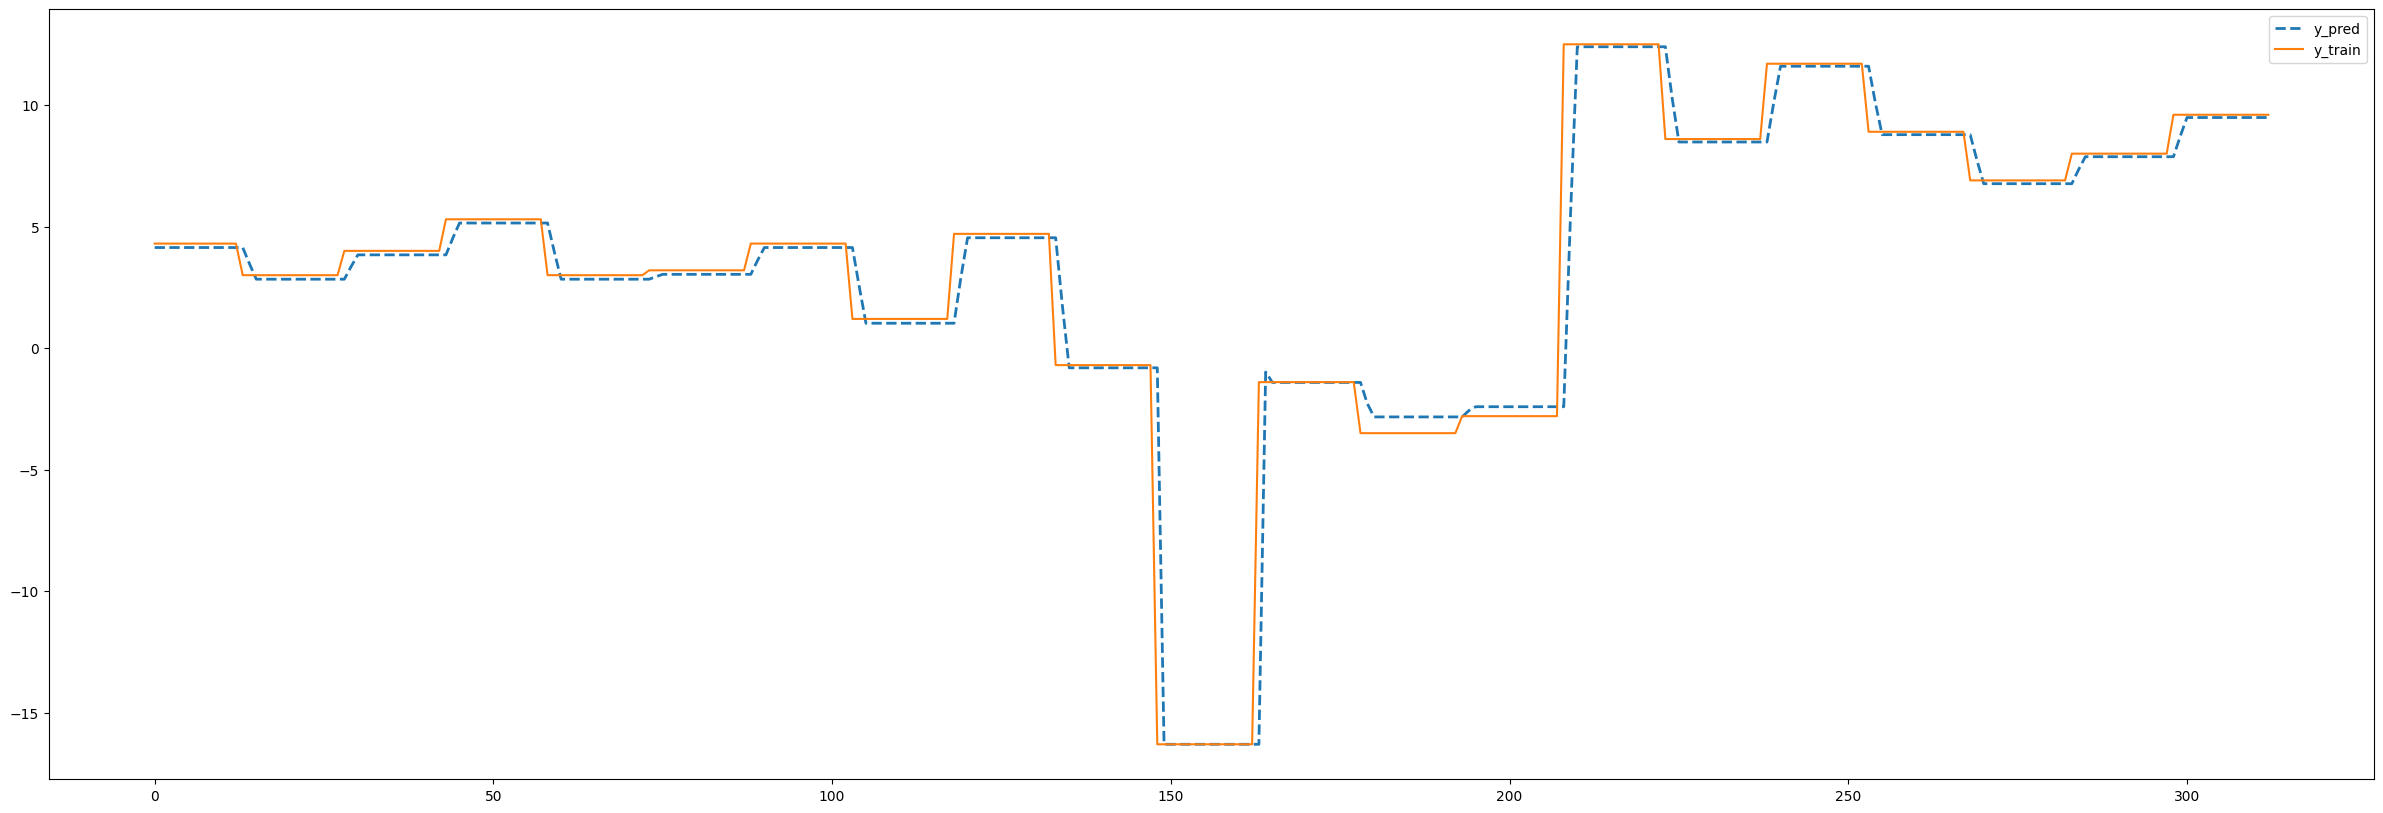

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, ls = '--', label = 'y_pred', lw = 2)
plt.plot(y_train, label = 'y_train')
plt.legend()
plt.show()

# Testing Data

In [ ]:
test = test_data.values.reshape(-1,1)

array([[14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [14.6],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 7.9],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [ 9.1],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [11. ],
       [11. ],
       [11. ],
       [11. ],
       [11. ],
       [11. ],
       [11

In [ ]:
scaled_test_set = scaler.fit_transform(test)

In [ ]:
x_test = []
y_test = []
step = 2

for i in range(step, test_len):
    x_test.append(scaled_test_set[i-step:i,0])
    y_test.append(scaled_test_set[i,0])

In [ ]:
X_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
# Reshape X_test to 3D
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_test = np.reshape(y_test, (-1,1))

In [ ]:
y_pred_test = model.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [ ]:
y_pred_test = scaler.inverse_transform(y_pred_test)

In [ ]:
y_test_actual = scaler.inverse_transform(y_test)

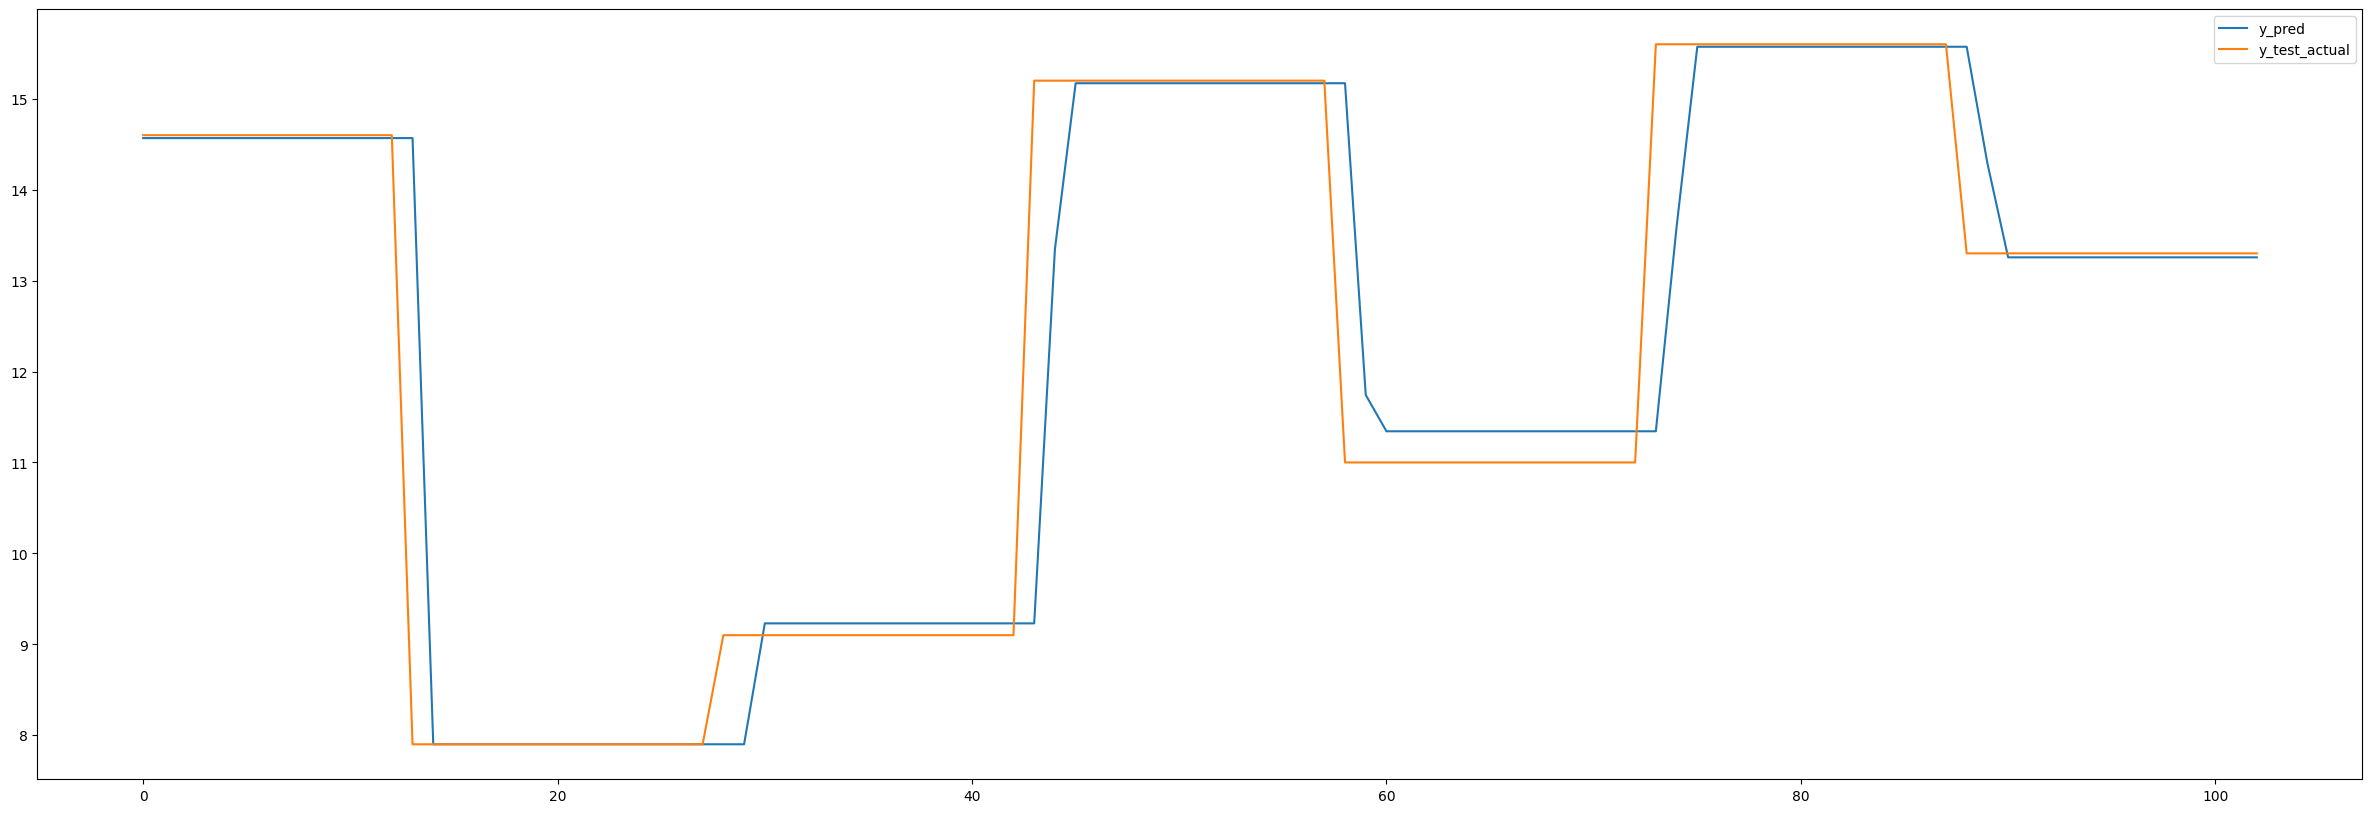

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_test, label = 'y_pred')
plt.plot(y_test_actual, label = 'y_test_actual')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss, accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.0220 - accuracy: 0.2718
0.02202228270471096 0.27184465527534485


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(y_test_actual, y_pred_test))
print("Test RMSE: %.2f" % rmse)

Test RMSE: 1.14


In [ ]:
##

import tensorflow as tf
import os
from tensorflow.keras.models import load_model

model.save(os.path.join('model', 'SimpleRNN_Forecasting.h5'))
new_model = load_model(os.path.join('model', 'SimpleRNN_Forecasting.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
